In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
merged_df = pd.read_excel("../Data/MergedData.xlsx")

In [4]:
columns = merged_df.columns
columns

Index(['Unnamed: 0', 'Country', 'Region', 'Ladder', 'Social Support',
       'Freedom', 'Corruption', 'Generosity', 'GDP per Capita',
       'Healthy Life Expectancy', 'Population Density', 'Birth Rate',
       'Obesity Rate (%)', 'Unemployment Rate (%)', 'Ladder rank',
       'Social Support rank', 'Freedom rank', 'Corruption rank',
       'Generosity rank', 'GDP per Capita rank',
       'Healthy Life Expectancy rank', 'Population Density rank',
       'Birth Rate rank', 'Obesity Rate (%) rank',
       'Unemployment Rate (%) rank'],
      dtype='object')

In [5]:
#Make a cleaner df: just the happiness column and 10 factors rank columns
clean_df = pd.DataFrame({"Country":merged_df["Country"],
                         "Region":merged_df["Region"],
                         "Happiness":merged_df["Ladder rank"],
                         "Social Support":merged_df["Social Support rank"],
                         "Freedom":merged_df["Freedom rank"],
                         "Corruption":merged_df["Corruption rank"],
                         "Generosity":merged_df["Generosity rank"],
                         "GDP per Capita":merged_df["GDP per Capita rank"],
                         "Healthy Life Expectancy":merged_df["Healthy Life Expectancy rank"],
                         "Population Density":merged_df["Population Density rank"],
                         "Birth Rate":merged_df["Birth Rate rank"],                        
                         "Obesity Rate":merged_df["Obesity Rate (%) rank"],
                         "Unemployment Rate":merged_df["Unemployment Rate (%) rank"],
                        })
clean_df.head()

,Country,Region,Happiness,Social Support,Freedom,Corruption,Generosity,GDP per Capita,Healthy Life Expectancy,Population Density,Birth Rate,Obesity Rate,Unemployment Rate
0,cambodia,Southeastern Asia,91,89,2,77,50,98,90,68,83,3,1
1,niger,Sub-Saharan Africa,94,116,92,42,110,124,120,14,125,12,2
2,thailand,Southeastern Asia,44,50,16,110,9,52,51,90,21,34,3
3,laos,Southeastern Asia,87,100,20,22,27,87,99,31,92,11,4
4,belarus,Central and Eastern Europe,68,31,110,31,86,50,65,40,17,94,5


In [6]:
#make a list of columns that need to make a scatter plot of
columns = clean_df.columns
columns = list(clean_df.columns)
columns.remove("Country")
columns.remove("Region")
columns.remove("Happiness")
columns

['Social Support',
 'Freedom',
 'Corruption',
 'Generosity',
 'GDP per Capita',
 'Healthy Life Expectancy',
 'Population Density',
 'Birth Rate',
 'Obesity Rate',
 'Unemployment Rate']

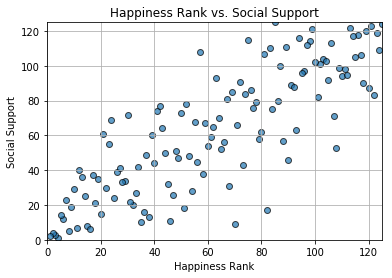

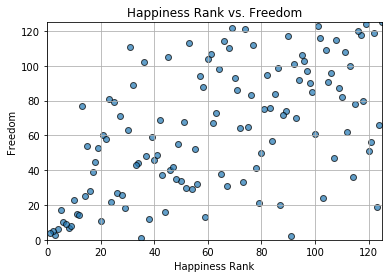

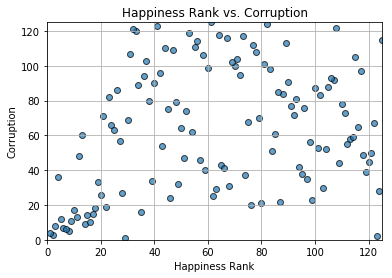

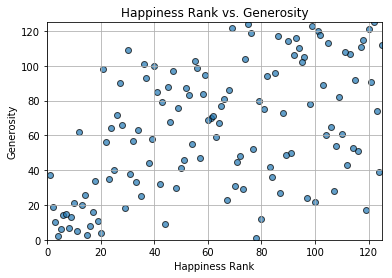

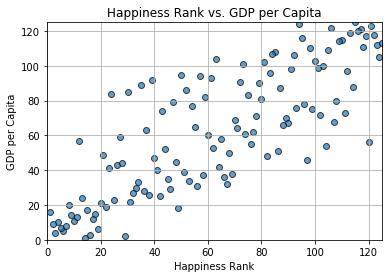

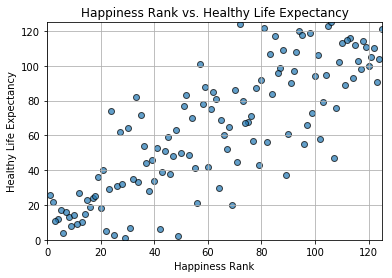

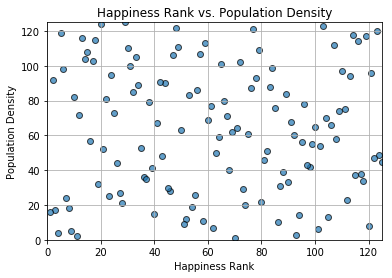

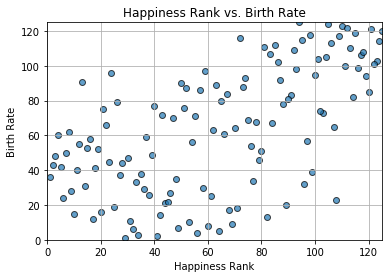

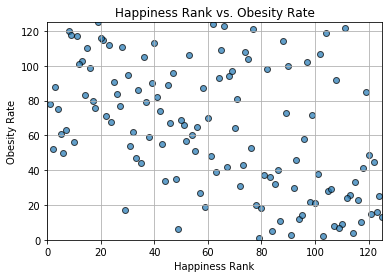

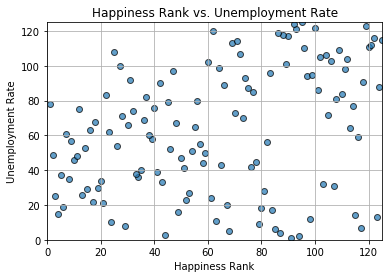

In [7]:
for factor in columns:
    plt.scatter(clean_df["Happiness"], clean_df[factor], edgecolor="black", alpha=0.7)
    plt.xlim(0,125)
    plt.ylim(0,125)
    plt.grid()

    plt.title(f"Happiness Rank vs. {factor}")
    plt.xlabel("Happiness Rank")
    plt.ylabel(factor)
    plt.savefig(f"../Paul Code/Happiness v {factor}.png")
    plt.show()

In [8]:
#make coefficients
coefficient_list = []
for factor in columns:
    coefficient = np.corrcoef(clean_df["Happiness"], clean_df[factor])
    coefficient_list.append(coefficient[0][1])

In [9]:
coefficient_list

[0.8242764976958523,
 0.5593978494623655,
 0.2892165898617511,
 0.49423655913978487,
 0.8025437788018431,
 0.8132288786482332,
 -0.013714285714285714,
 0.5984331797235022,
 -0.47773271889400915,
 0.33222734254992314]

In [10]:
#add data for temperature from Seunghwa's work:
columns.append("Temperature")
coefficient_list.append(0.06820241)

In [11]:
coeff_pd = pd.DataFrame({"Factor":columns,"Coefficient":coefficient_list})
coeff_pd=coeff_pd.sort_values("Coefficient", axis = 0, ascending = True)
coeff_pd

,Factor,Coefficient
8,Obesity Rate,-0.477733
6,Population Density,-0.013714
10,Temperature,0.068202
2,Corruption,0.289217
9,Unemployment Rate,0.332227
3,Generosity,0.494237
1,Freedom,0.559398
7,Birth Rate,0.598433
4,GDP per Capita,0.802544
5,Healthy Life Expectancy,0.813229
